In [1]:
# 0) Imports & Settings
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

pd.set_option("display.max_columns", 10)
pd.set_option("display.width", 120)

In [2]:
DATA_DIR = "D:/Documents/USTH/ML in MED/ECG_dataset" 

FILES = {
    "mitbih_train": "mitbih_train.csv",
    "mitbih_test": "mitbih_test.csv",
    "ptbdb_normal": "ptbdb_normal.csv",
    "ptbdb_abnormal": "ptbdb_abnormal.csv",
}

for k, v in FILES.items():
    fpath = os.path.join(DATA_DIR, v)
    if not os.path.exists(fpath):
        raise FileNotFoundError(f"Missing file: {fpath}")

print("✅ All dataset files found in:", os.path.abspath(DATA_DIR))


✅ All dataset files found in: D:\Documents\USTH\ML in MED\ECG_dataset


In [3]:
mit_train = pd.read_csv(os.path.join(DATA_DIR, FILES["mitbih_train"]), header=None)
mit_test  = pd.read_csv(os.path.join(DATA_DIR, FILES["mitbih_test"]), header=None)

ptb_normal   = pd.read_csv(os.path.join(DATA_DIR, FILES["ptbdb_normal"]), header=None)
ptb_abnormal = pd.read_csv(os.path.join(DATA_DIR, FILES["ptbdb_abnormal"]), header=None)

print("MIT-BIH train shape:", mit_train.shape)
print("MIT-BIH test  shape:", mit_test.shape)
print("PTB normal    shape:", ptb_normal.shape)
print("PTB abnormal  shape:", ptb_abnormal.shape)

MIT-BIH train shape: (87554, 188)
MIT-BIH test  shape: (21892, 188)
PTB normal    shape: (4046, 188)
PTB abnormal  shape: (10506, 188)


In [6]:
SIGNAL_COLS = list(range(187))  # 0..186
LABEL_COL = 187

X_mit_train = mit_train[SIGNAL_COLS].astype(np.float32)
y_mit_train = mit_train[LABEL_COL].astype(int)

X_mit_test = mit_test[SIGNAL_COLS].astype(np.float32)
y_mit_test = mit_test[LABEL_COL].astype(int)

# For PTB: combine and keep binary labels already provided
ptb = pd.concat([ptb_normal, ptb_abnormal], axis=0, ignore_index=True)
X_ptb = ptb[SIGNAL_COLS].astype(np.float32)
y_ptb = ptb[LABEL_COL].astype(int)

print("\nMIT train X:", X_mit_train.shape, "y:", y_mit_train.shape)
print("MIT test  X:", X_mit_test.shape, "y:", y_mit_test.shape)
print("PTB      X:", X_ptb.shape, "y:", y_ptb.shape)


MIT train X: (87554, 187) y: (87554,)
MIT test  X: (21892, 187) y: (21892,)
PTB      X: (14552, 187) y: (14552,)


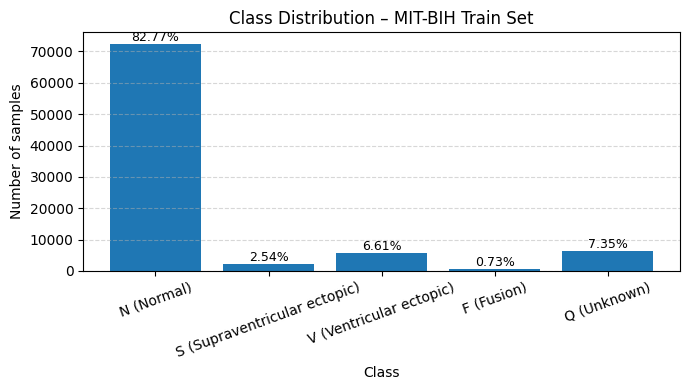

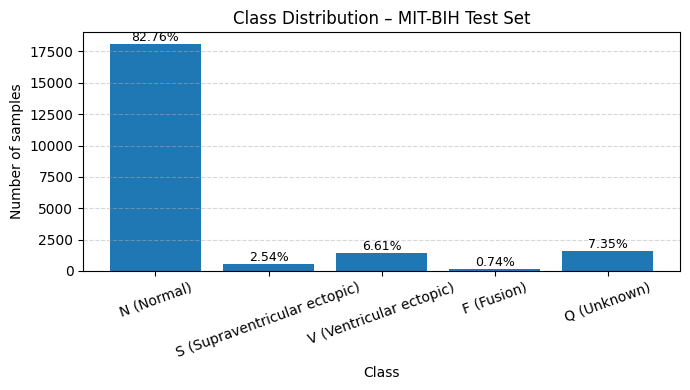

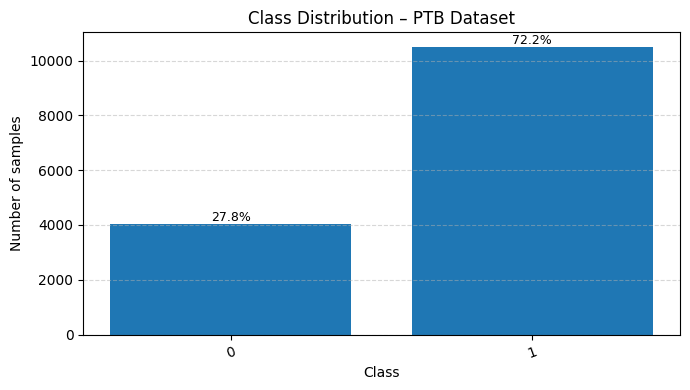


MIT-BIH Train distribution:


,count,percent,class_name
187,,,
0,72471,82.77,N (Normal)
1,2223,2.54,S (Supraventricular ectopic)
2,5788,6.61,V (Ventricular ectopic)
3,641,0.73,F (Fusion)
4,6431,7.35,Q (Unknown)



MIT-BIH Test distribution:


,count,percent,class_name
187,,,
0,18118,82.76,N (Normal)
1,556,2.54,S (Supraventricular ectopic)
2,1448,6.61,V (Ventricular ectopic)
3,162,0.74,F (Fusion)
4,1608,7.35,Q (Unknown)



PTB distribution:


,count,percent
187,,
0,4046,27.8
1,10506,72.2


In [8]:
# ============================================================
# Class Distribution + Visualization (MIT-BIH & PTB)
# ============================================================

import matplotlib.pyplot as plt
import pandas as pd


# Label Meaning (MIT-BIH 5-class)
MIT_LABEL_MAP = {
    0: "N (Normal)",
    1: "S (Supraventricular ectopic)",
    2: "V (Ventricular ectopic)",
    3: "F (Fusion)",
    4: "Q (Unknown)"
}


def plot_class_distribution(
    y: pd.Series,
    title: str,
    label_map: dict | None = None,
    save_path: str | None = None
):
    """
    Plot class distribution as a bar chart and return summary table.
    """
    counts = y.value_counts().sort_index()
    perc = (counts / counts.sum() * 100).round(2)

    df = pd.DataFrame({
        "count": counts,
        "percent": perc
    })

    if label_map is not None:
        df["class_name"] = [label_map.get(i, str(i)) for i in df.index]
        labels = df["class_name"]
    else:
        labels = df.index.astype(str)

    # ---- Plot ----
    plt.figure(figsize=(7, 4))
    bars = plt.bar(labels, df["count"])

    plt.title(title)
    plt.ylabel("Number of samples")
    plt.xlabel("Class")
    plt.xticks(rotation=20)
    plt.grid(axis="y", linestyle="--", alpha=0.5)

    # Annotate percentage on bars
    for bar, p in zip(bars, df["percent"]):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{p}%",
            ha="center",
            va="bottom",
            fontsize=9
        )

    plt.tight_layout()

    if save_path is not None:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")

    plt.show()

    return df


# ============================================================
# Apply to datasets
# ============================================================

# MIT-BIH train
df_train = plot_class_distribution(
    y_mit_train,
    title="Class Distribution – MIT-BIH Train Set",
    label_map=MIT_LABEL_MAP,
    save_path="D:/Documents/USTH/ML in MED/mlmed2026/figures/mitbih_train_distribution.png"
)

# MIT-BIH test
df_test = plot_class_distribution(
    y_mit_test,
    title="Class Distribution – MIT-BIH Test Set",
    label_map=MIT_LABEL_MAP,
    save_path="D:/Documents/USTH/ML in MED/mlmed2026/figures/mitbih_test_distribution.png"
)

# PTB (binary)
df_ptb = plot_class_distribution(
    y_ptb,
    title="Class Distribution – PTB Dataset",
    label_map=None,
    save_path="D:/Documents/USTH/ML in MED/mlmed2026/figures//ptb_distribution.png"
)

# Show tables (for notebook inspection)
print("\nMIT-BIH Train distribution:")
display(df_train)

print("\nMIT-BIH Test distribution:")
display(df_test)

print("\nPTB distribution:")
display(df_ptb)


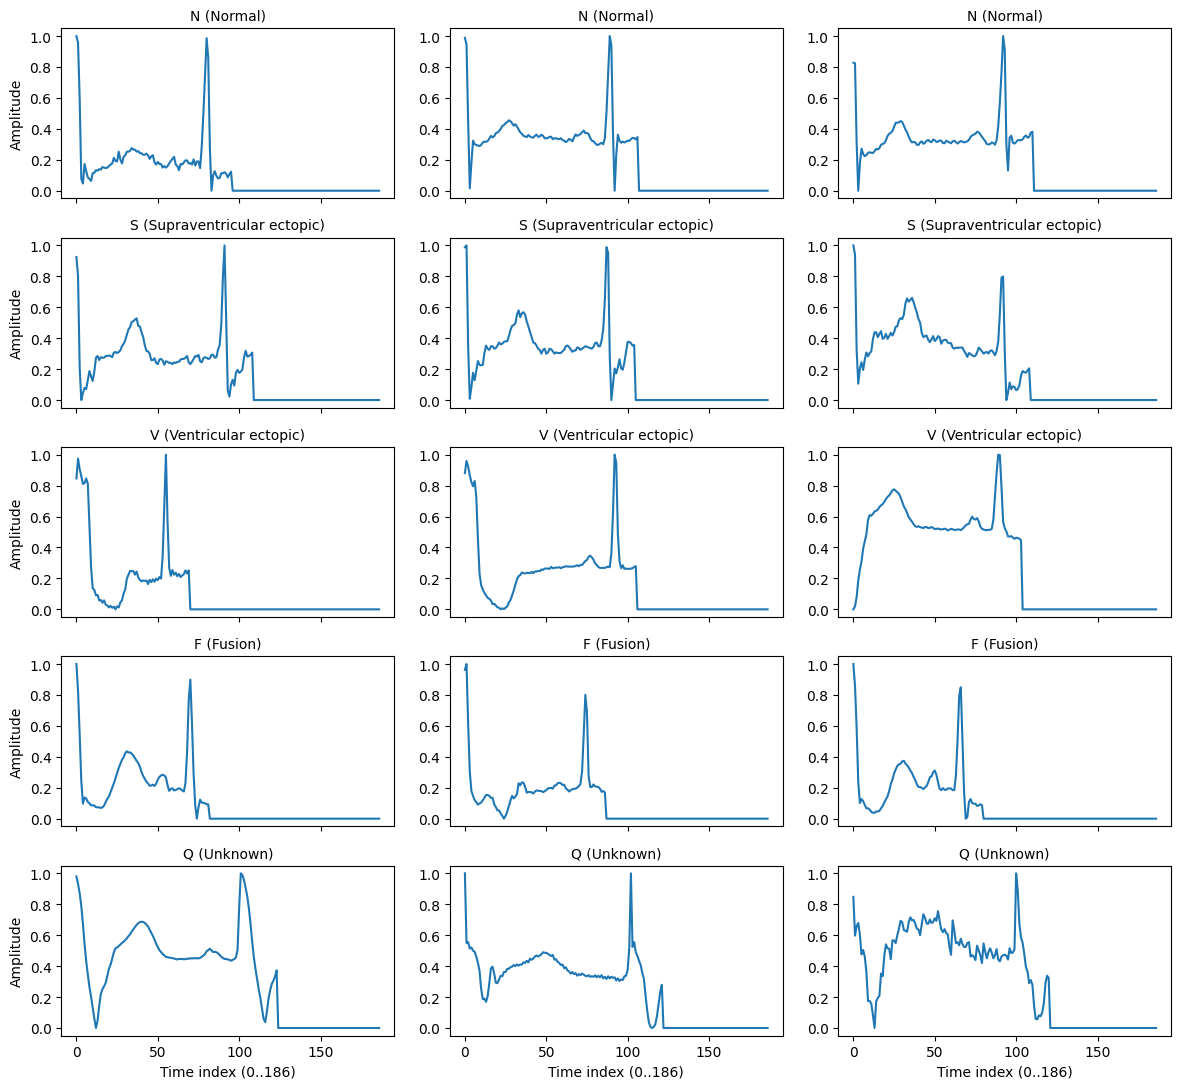

In [9]:
# Plot Example Heartbeats (per class)
# ------------------------------------------------------------
import os
os.makedirs("figures", exist_ok=True)

def plot_examples_per_class(X: pd.DataFrame, y: pd.Series, mapping: dict, n_per_class: int = 3) -> None:
    """
    Plots n_per_class example heartbeats for each class.
    """
    classes = sorted(mapping.keys())
    nrows = len(classes)
    ncols = n_per_class

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 2.2*nrows), sharex=True, sharey=False)
    if nrows == 1:
        axes = np.array([axes])

    for i, c in enumerate(classes):
        idx = np.where(y.values == c)[0]
        if len(idx) == 0:
            continue

        chosen = np.random.choice(idx, size=min(n_per_class, len(idx)), replace=False)
        for j in range(ncols):
            ax = axes[i, j]
            if j < len(chosen):
                signal = X.iloc[chosen[j]].values
                ax.plot(signal)
                ax.set_title(mapping[c], fontsize=10)
            else:
                ax.axis("off")

            if i == nrows - 1:
                ax.set_xlabel("Time index (0..186)")
            if j == 0:
                ax.set_ylabel("Amplitude")

    plt.tight_layout()

    plt.savefig(
    "figures/mitbih_examples_per_class.png",
    dpi=300,
    bbox_inches="tight"
    )

    plt.show()


plot_examples_per_class(X_mit_train, y_mit_train, MIT_LABEL_MAP, n_per_class=3)


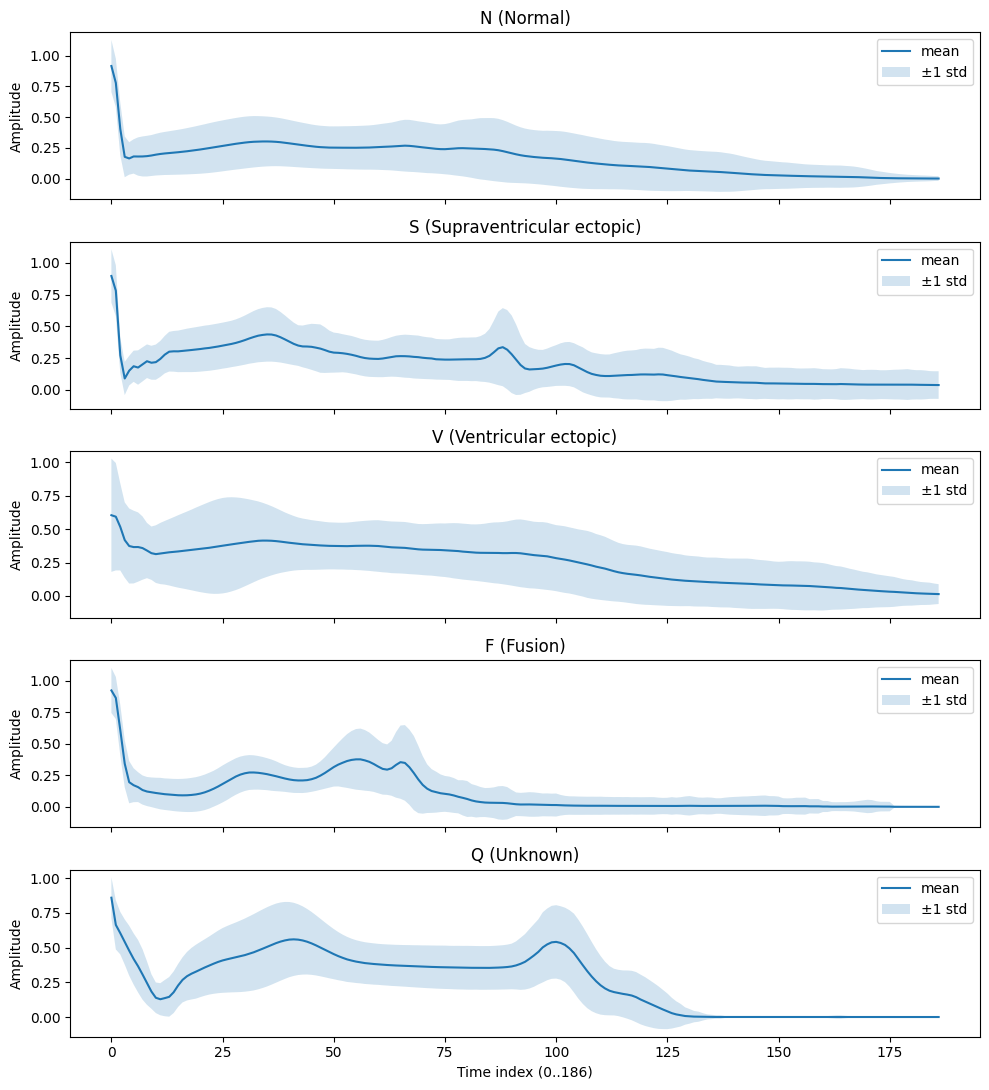

In [10]:

# Average Heartbeat Shape per Class (MIT-BIH)
# ------------------------------------------------------------
def plot_mean_and_std_per_class(X: pd.DataFrame, y: pd.Series, mapping: dict) -> None:
    """
    For each class: plot mean waveform and +/- 1 std band.
    """
    classes = sorted(mapping.keys())
    fig, axes = plt.subplots(nrows=len(classes), ncols=1, figsize=(10, 2.2*len(classes)), sharex=True)

    if len(classes) == 1:
        axes = [axes]

    for ax, c in zip(axes, classes):
        Xc = X[y.values == c].values
        if Xc.size == 0:
            continue
        mean = Xc.mean(axis=0)
        std = Xc.std(axis=0)

        ax.plot(mean, label="mean")
        ax.fill_between(np.arange(mean.shape[0]), mean-std, mean+std, alpha=0.2, label="±1 std")
        ax.set_title(mapping[c])
        ax.set_ylabel("Amplitude")
        ax.legend(loc="upper right")

    axes[-1].set_xlabel("Time index (0..186)")
    plt.tight_layout()

    plt.savefig(
        "figures/mitbih_mean_std_per_class.png",
        dpi=300,
        bbox_inches="tight"
    )

    plt.show()

plot_mean_and_std_per_class(X_mit_train, y_mit_train, MIT_LABEL_MAP)

